# Logistic Regression(3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int')

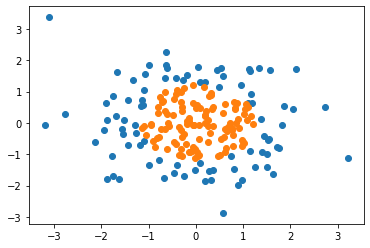

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

### 1. 使用逻辑回归

In [4]:
from LogisticReg.LogisticRegression import LogisticRegression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [7]:
log_reg.score(X, y)

0.605

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predic = model.predict(X_new)
    zz = y_predic.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF590', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

**绘制决策边界**

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


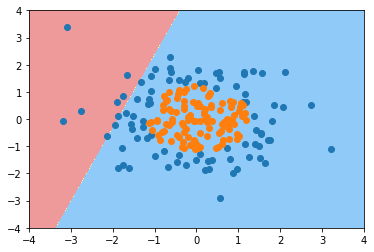

In [7]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

### 2. 使用多项式 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [9]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

In [10]:
poly_log_reg.score(X, y)

0.95

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


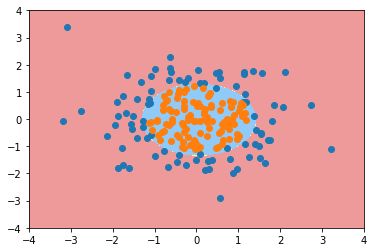

In [11]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

### 3. 使用正则化(scikit-learn)

**scikit-learn中使用的正则化方式：**
$$C \cdot J(\theta) + L_1$$
$$C \cdot J(\theta) + L_2$$

In [12]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:,1] < 1.5, dtype='int')
# 为样本添加噪音
for _ in range(20):
    y[np.random.randint(200)] = 1

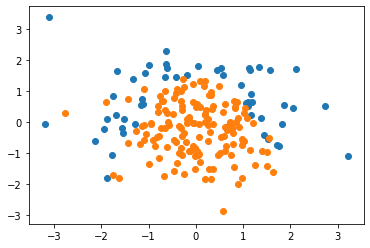

In [13]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [17]:
log_reg.score(X_test, y_test)

0.86

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


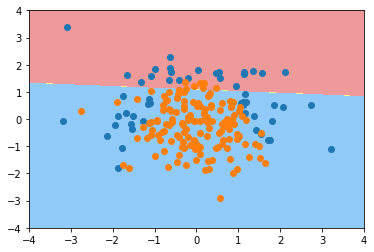

In [18]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

#### scikit-learn中多项式逻辑回归

In [19]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver='lbfgs'))
    ])

In [20]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [21]:
poly_log_reg.score(X_train, y_train)

0.9066666666666666

In [22]:
poly_log_reg.score(X_test, y_test)

0.94

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


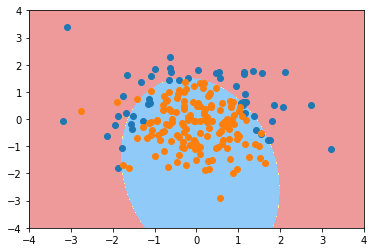

In [23]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

**增加多项式**

In [31]:
poly_log_reg2 = PolynomialLogisticRegression(degree=30)
poly_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


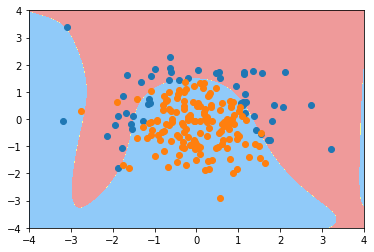

In [32]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [33]:
poly_log_reg2.score(X_train, y_train)

0.94

In [34]:
poly_log_reg2.score(X_test, y_test)

0.92

- 当 degree = 20 时，训练集分数提高，但是预测数据集分数下降，说明你模型泛化能力下降
- 即模型发生了过拟合

#### 加入超参数 C 对模型正则化
- 减小损失函数的影响，增大正则化的影响

In [35]:
# C: 分类准确度，损失函数前面的系数
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver='lbfgs', C=C))
    ])

In [36]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)

In [37]:
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


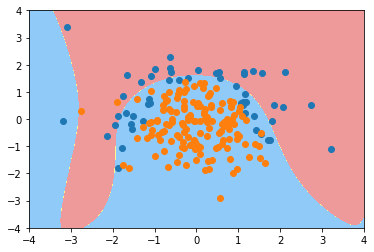

In [39]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [40]:
poly_log_reg3.score(X_train, y_train)

0.84

In [41]:
poly_log_reg3.score(X_test, y_test)

0.92

- 可以看出，此时模型泛化能力提高